In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import time
from IPython.display import clear_output

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.regularizers import l1, l2, L1L2

In [5]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

In [11]:
def build_model():
    model = keras.Sequential()
    model.add(Input((28,28)))
    model.add(Reshape((28,28,1))) # ADDED
    model.add(Conv2D(32, (3, 3))) # ADDED
    model.add(MaxPooling2D((2, 2))) # ADDED
    model.add(Conv2D(64, (3, 3))) # ADDED
    model.add(MaxPooling2D((2, 2))) # ADDED
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer="adam", 
                    loss="sparse_categorical_crossentropy", 
                    metrics=["accuracy"])
    return model

In [15]:
class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.accuracies = []
        self.val_accuracies = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.accuracies.append(logs.get('accuracy'))
        self.val_accuracies.append(logs.get('val_accuracy'))
        self.i += 1

        clear_output(wait=True)
        
        fig, ax = plt.subplots()
        ax.plot(self.x, self.losses, label="loss")
        ax.plot(self.x, self.val_losses, label="val_loss")
        
        ax2 = ax.twinx()
        ax2.plot(self.x, self.accuracies, label="accuracy")
        ax2.plot(self.x, self.val_accuracies, label="val_accuracy")
        
        ax.legend()
        ax2.legend()
        plt.show();
        txt = f"""loss = {self.losses[-1]}\n\
        val_loss = {self.val_losses[-1]}\n\
        acc = {self.accuracies[-1]}\n\
        val_accuracy = {self.val_accuracies[-1]}"""

        print(txt)

In [16]:
model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]

In [17]:
def fit_one_more(model, train_x, train_y, test_x, test_y, callbacks, batch_size=20):
    start_time = time.time()
    history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size, 
                validation_split=0.1, callbacks=callbacks)
    # model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size,
    #           validation_data=(test_x, test_y))
    print("elapsed : {}".format(time.time() - start_time))
    return history

In [18]:
model = build_model()

<Figure size 640x480 with 0 Axes>

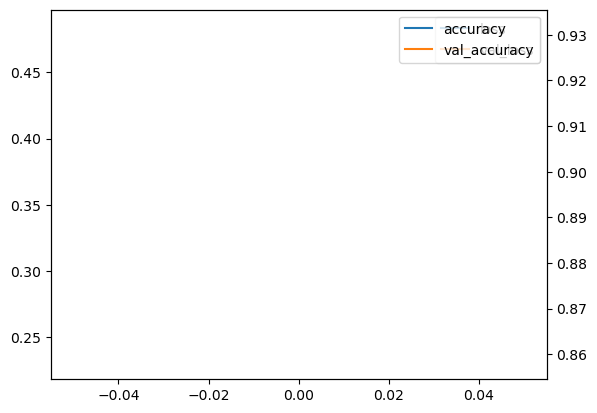

loss = 0.4845894466417807
        val_loss = 0.23090129669507345
        acc = 0.8582037091255188
        val_accuracy = 0.9318333268165588
54000/54000 [==============================] - 81s 2ms/sample - loss: 0.4846 - accuracy: 0.8582 - val_loss: 0.2309 - val_accuracy: 0.9318


In [20]:
history = model.fit(train_x, train_y, epochs=1, verbose=1, batch_size=128, 
                validation_split=0.1, callbacks=callbacks)

- conv2d 파라미터 수 = (conv필터 가로 * conv 필터 세로 * 데이터 깊이 + bias 1개) * 필터 수